In [1]:
import pandas as pd, os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gaussian_kde
import plotly.express as pe 
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv(os.getcwd()+"\\data\\norway_new_car_sales_by_make.csv")
df['Date']= pd.to_datetime(df['Year'].astype(str)+ df['Month'].astype(str), format='%Y%m')
df = (df.loc[df["Make"] == 'Toyota',["Date","Quantity"]]
        .rename(columns={"Quantity":"Sales"}).set_index("Date"))
df = df.iloc[1:]
df.head()

,Sales
Date,
2007-02-01,1885
2007-03-01,1833
2007-04-01,1300
2007-05-01,1866
2007-06-01,1620


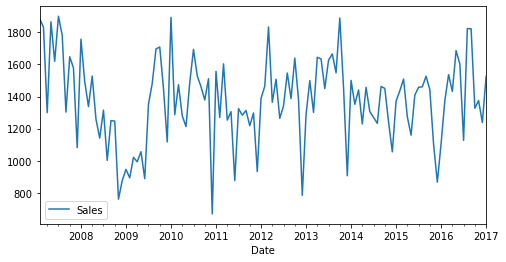

In [3]:
df.plot(figsize=(8,4))

histograms have arbitary bins and the transitions are not smooth. So we use KDE.

In [4]:
kde_dist = gaussian_kde(df['Sales'], bw_method='scott')


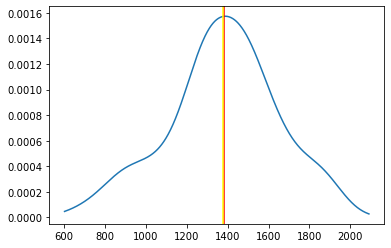

In [5]:
x = np.linspace(df['Sales'].min()*0.9, df['Sales'].max() * 1.1, 1000)
y_kde = kde_dist.pdf(x)
plt.plot(x, y_kde) 
plt.axvline(df.Sales.median(), color='red')
plt.axvline(df.Sales.mean(), color='yellow')

find out CDF (cumulative distribution function)

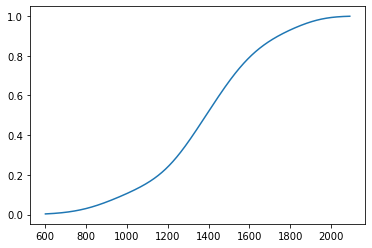

In [6]:
def kde_cdf(kde_dist,x):
  cdf = []
  for value in x:
    cdf.append(kde_dist.integrate_box_1d(-np.inf,value))
  return cdf
plt.plot(x,kde_cdf(kde_dist,x))

merge plots together 

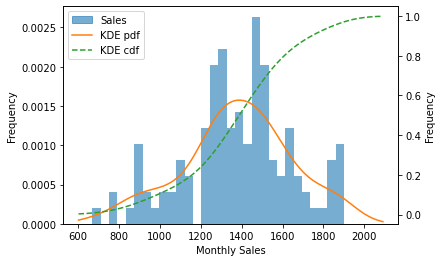

In [7]:
import matplotlib.patches as mpatches 
fig, ax = plt.subplots() 
df['Sales'].plot(ax=ax, kind='hist',density=True, bins=30, alpha=0.6)
patch = mpatches.Patch(color='C0',alpha=0.6,label='Sales')
x= np.linspace(df['Sales'].min() * 0.9, df['Sales'].max() * 1.1, 1000)
y_kde = kde_dist.pdf(x)
plot2 = ax.plot(x,y_kde, lw=1.5)
ax.set_xlabel('Monthly Sales')
ax1=ax.twinx() 
ax1.set_ylabel('Frequency')
plot3 = ax1.plot(x, kde_cdf(kde_dist,x), ls='--',color='C2',lw=1.5)
ax.legend([patch]+plot2+plot3,['Sales','KDE pdf','KDE cdf'],loc='upper left')
plt.show()



the continous distribution above is giving us a probability for an infinite range of posibilities. when transfering to a disrete one, we can set a lower and upper bound to the demand distribution arbitrarily.  Instead we can use a smarter technique: we can set these bounds based on lowest and highest demand observations respectively, subtracted or added to anarbitrary multiple of the bandwidth. 

In [19]:
bandwidth = df['Sales'].std() / (df['Sales'].count()**(1/5))
bandwidth

101.85151358562536

In [21]:
lower = np.floor(df["Sales"].min() - 3 * bandwidth)
upper = np.ceil(df['Sales'].max() + 3 * bandwidth)
x= np.arange(lower, upper, step=1)
x

array([ 362.,  363.,  364., ..., 2204., 2205., 2206.])

In [22]:
pmf = kde_dist.pdf(x)
pmf = pmf/sum(pmf)
pmf

array([3.80254685e-07, 3.91844907e-07, 4.03751703e-07, ...,
       1.52242727e-06, 1.47613528e-06, 1.43111959e-06])

In [ ]:
plt.plot(x, pmf)